In [36]:
import numpy as np
import pandas as pd
import sklearn
import statsmodels.api as sm
from ISLP import load_data # Used to load the Carseats dataset for Part 2
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

print("All imports successful")

All imports successful


# Part 1: Conceptual Question 3

Suppose we have a data set with five predictors:

- $X_1$ = GPA  
- $X_2$ = IQ  
- $X_3$ = Level (1 for College and 0 for High School)  
- $X_4$ = Interaction between GPA and IQ  
- $X_5$ = Interaction between GPA and Level  

The response is starting salary after graduation (in thousands of dollars).

Suppose we use least squares to fit the model, and obtain the following estimates:

- $\hat{\beta}_0 = 50$  
- $\hat{\beta}_1 = 20$  
- $\hat{\beta}_2 = 0.07$  
- $\hat{\beta}_3 = 35$  
- $\hat{\beta}_4 = 0.01$  
- $\hat{\beta}_5 = -10$  

---

## (a) Interpretation

Which answer is correct, and why?

i. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates.  

ii. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates.  

iii. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.  

iv. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided that the GPA is high enough.  

---

## (b) Prediction

Predict the salary of a college graduate with an IQ of 110 and a GPA of 4.0.

---

## (c) Interaction Effect

True or false:

Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect.

Justify your answer.

# Part 1 Answers

## Conceptual Question #3

### (a) Interpretation

**Correct answer: (iii)**

Because the model includes an interaction between GPA and Level, the effect of being a college graduate depends on GPA.

The fitted model is:

$$
\hat{Y} = 50 + 20 \cdot GPA + 0.07 \cdot IQ + 35 \cdot Level + 0.01 (GPA \cdot IQ) - 10 (GPA \cdot Level)
$$

For fixed GPA and IQ, the difference in predicted salary between a college graduate (Level = 1) and a high school graduate (Level = 0) is:

$$
\hat{Y}_{college} - \hat{Y}_{hs} = 35 - 10 \cdot GPA
$$

Thus, college graduates earn more when:

$$
35 - 10 \cdot GPA > 0 \Rightarrow GPA < 3.5
$$

When GPA is high enough (GPA > 3.5), the predicted difference becomes negative, meaning high school graduates earn more on average.

This corresponds to **option (iii)**.

---

### (b) Prediction

For a college graduate with:

- IQ = 110  
- GPA = 4.0  
- Level = 1  

$$
\hat{Y} = 50 + 20(4.0) + 0.07(110) + 35(1) + 0.01(4.0 \cdot 110) - 10(4.0 \cdot 1)
$$

$$
\hat{Y} = 137.1
$$

Predicted salary: **$137,100**

---

### (c) Interaction Effect

**False**

A small coefficient does not imply little evidence of an interaction effect.

Evidence depends on:
- statistical significance (t-statistic and p-value)
- scale and range of the variables

Even a small interaction coefficient can meaningfully impact predictions when variables take realistic values.

In [37]:
# Conceptual Q3 sanity checks (no dataset needed)

beta0, beta1, beta2, beta3, beta4, beta5 = 50, 20, 0.07, 35, 0.01, -10

def predict_salary(gpa, iq, level):
    return (beta0
            + beta1*gpa
            + beta2*iq
            + beta3*level
            + beta4*(gpa*iq)
            + beta5*(gpa*level))

# (b) College graduate: IQ=110, GPA=4.0, Level=1
y_hat = predict_salary(gpa=4.0, iq=110, level=1)
y_hat

137.1

In [38]:
# (a) Difference between College (Level=1) and High School (Level=0) at fixed GPA and IQ
# This should simplify to: 35 - 10*GPA

def college_minus_hs(gpa, iq):
    return predict_salary(gpa=gpa, iq=iq, level=1) - predict_salary(gpa=gpa, iq=iq, level=0)

for gpa in [2.0, 3.0, 3.5, 4.0]:
    diff = college_minus_hs(gpa=gpa, iq=110)
    print(f"GPA={gpa:.1f} -> College - HS = {diff:.1f} (thousand)")

GPA=2.0 -> College - HS = 15.0 (thousand)
GPA=3.0 -> College - HS = 5.0 (thousand)
GPA=3.5 -> College - HS = -0.0 (thousand)
GPA=4.0 -> College - HS = -5.0 (thousand)


# Part 2: Applied Question #10 (Carseats Dataset)

This question should be answered using the **Carseats** dataset.

---

### (a) Model Fitting

Fit a multiple regression model to predict `Sales` using the following predictors:

- `Price`
- `Urban`
- `US`

---

### (b) Interpretation of Coefficients

Provide an interpretation of each coefficient in the model.

> Note: Some of the variables are **qualitative (categorical)**. Be careful to interpret them relative to their baseline levels.

---

### (c) Model Equation

Write out the fitted model in equation form.

Be sure to correctly represent the qualitative variables (e.g., indicator/dummy variables).

---

### (d) Hypothesis Testing

For which predictors can you reject the null hypothesis:

H0: βj = 0

Base your answer on statistical significance (e.g., p-values).

---

### (e) Reduced Model

Based on your findings in part (d), fit a smaller model that includes only the predictors that show evidence of association with `Sales`.

---

### (f) Model Comparison

Compare the models from parts (a) and (e).

Discuss how well each model fits the data (e.g., R², Adjusted R², residual standard error).

---

### (g) Confidence Intervals

Using the model from part (e), compute 95% confidence intervals for the coefficient(s).

---

### (h) Diagnostics

Determine whether there is evidence of:

- Outliers  
- High-leverage observations  

Use appropriate diagnostic tools (e.g., residual plots, leverage statistics).

In [39]:
#Load the Carseats dataset and display the first five rows
carseats = load_data("Carseats")
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [40]:
#  Quick sanity check of the dataset information and quality
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


## Part 2(a): Model Fitting

Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.

Model specification:

- Response: `Sales`
- Predictors: `Price`, `Urban`, `US`

In [41]:
# Fit multiple regression model
model_a = smf.ols("Sales ~ Price + Urban + US", data=carseats).fit()

# Display results
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 22 Feb 2026   Prob (F-statistic):           2.39e-23
Time:                        16:46:50   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

## Part 2(b): Interpretation of Coefficients

The fitted regression model estimates the relationship between `Sales` and the predictors `Price`, `Urban`, and `US`.

- **Intercept (13.0435)**  
  The intercept represents the expected sales when all predictors are at their baseline levels. Specifically, this corresponds to a store with `Price = 0`, located in a non-urban area (`Urban = No`), and outside the United States (`US = No`). While not practically meaningful, it serves as a reference point for the model.

- **Price (-0.0545)**  
  Holding all other variables constant, a one-unit increase in `Price` is associated with a decrease in `Sales` of approximately 0.0545 units. This indicates a negative relationship between price and sales, which is consistent with economic intuition.

- **Urban[T.Yes] (-0.0219)**  
  This coefficient represents the difference in sales between stores located in urban areas (`Urban = Yes`) and non-urban areas (`Urban = No`), holding other variables constant. The estimated effect is very small and not statistically significant, suggesting no meaningful difference in sales based on urban status.

- **US[T.Yes] (1.2006)**  
  This coefficient represents the difference in sales between stores located in the United States (`US = Yes`) and those outside the United States (`US = No`), holding other variables constant. Stores in the United States are associated with approximately 1.2006 higher sales on average.

### Statistical Significance

Based on the p-values:

- `Price` is statistically significant (p < 0.001)
- `US` is statistically significant (p < 0.001)
- `Urban` is not statistically significant (p = 0.936)

This suggests that `Price` and `US` are important predictors of `Sales`, while `Urban` is not.

In [42]:
model_a.params

Intercept       13.043469
Urban[T.Yes]    -0.021916
US[T.Yes]        1.200573
Price           -0.054459
dtype: float64

## Part 2(d): Hypothesis Testing

For each predictor, we test the null hypothesis:

H0: βj = 0

Using α = 0.05 and the p-values from the regression output:

- `Price`: p < 0.001, so we reject H0 and conclude `Price` is associated with `Sales`.
- `US[T.Yes]`: p < 0.001, so we reject H0 and conclude `US` is associated with `Sales`.
- `Urban[T.Yes]`: p = 0.936, so we fail to reject H0 and conclude there is no evidence that `Urban` is associated with `Sales` after accounting for the other predictors.

In [43]:
model_a.pvalues

Intercept       3.626602e-62
Urban[T.Yes]    9.357389e-01
US[T.Yes]       4.860245e-06
Price           1.609917e-22
dtype: float64

# Part 2 (e): Reduced model (remove Urban)

In [44]:
# Part (e): Reduced model (remove Urban)

model_e = smf.ols("Sales ~ Price + US", data=carseats).fit()

# Display results
print(model_e.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 22 Feb 2026   Prob (F-statistic):           2.66e-24
Time:                        16:46:50   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

# Part 2(f): Model Comparison

We compare the full model:

Sales ~ Price + Urban + US

with the reduced model:

Sales ~ Price + US

## Model Fit Metrics

| Metric              | Full Model | Reduced Model |
|--------------------|-----------|---------------|
| R-squared          | 0.239     | 0.239         |
| Adjusted R-squared | 0.234     | 0.235         |
| Residual Std Error | ~2.47     | ~2.47         |

## Interpretation

The two models have nearly identical performance:

- **R-squared** remains unchanged (0.239), indicating that both models explain the same proportion of variance in `Sales`.
- **Adjusted R-squared** slightly increases in the reduced model (0.235 vs 0.234), suggesting a marginal improvement after removing an unnecessary predictor.
- **Residual standard error** remains essentially the same, indicating no loss in predictive accuracy.

## Conclusion

The reduced model is preferred because:

- It is **simpler (more parsimonious)**
- It achieves **equal or slightly better fit**
- It excludes a **non-significant variable (`Urban`)**

This aligns with the principle of choosing the simplest model that adequately explains the data.

Part 2(g): Confidence Intervals

In [45]:
# 95% confidence intervals for reduced model (Part e)
model_e.conf_int()

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


In [46]:
ci = model_e.conf_int()
ci.columns = ["Lower 95%", "Upper 95%"]
ci

,Lower 95%,Upper 95%
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


# Part (h): Diagnostics (Code Cell)

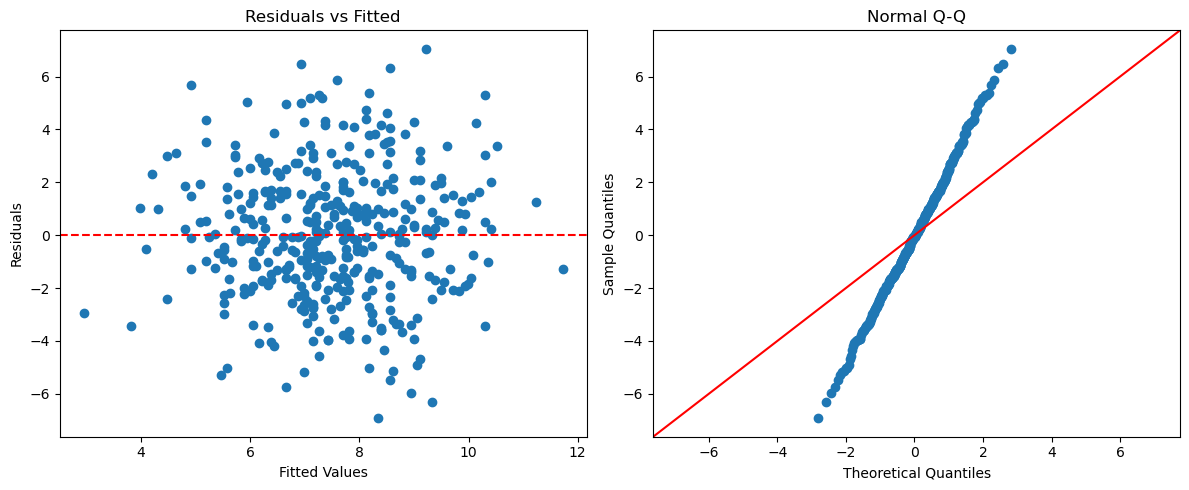

Max leverage: 0.043337657037178824
Max Cook's distance: 0.026109457163419517


In [47]:
# Residuals vs Fitted
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Residuals vs Fitted
ax[0].scatter(model_e.fittedvalues, model_e.resid)
ax[0].axhline(y=0, color='r', linestyle='--')
ax[0].set_xlabel("Fitted Values")
ax[0].set_ylabel("Residuals")
ax[0].set_title("Residuals vs Fitted")

# Plot 2: QQ Plot
sm.qqplot(model_e.resid, line='45', ax=ax[1])
ax[1].set_title("Normal Q-Q")

plt.tight_layout()
plt.show()

# Influence / leverage
influence = model_e.get_influence()

# Leverage values
leverage = influence.hat_matrix_diag

# Cook's distance
cooks = influence.cooks_distance[0]

print("Max leverage:", leverage.max())
print("Max Cook's distance:", cooks.max())

## Part 2(h): Diagnostics

To assess model assumptions and identify potential issues, diagnostic plots and influence statistics were examined.

The **Residuals vs Fitted** plot does not show a clear pattern, suggesting that the assumption of linearity is reasonable and that there is no strong evidence of heteroscedasticity.

The **Q-Q plot** indicates that residuals are approximately normally distributed, as most points lie close to the reference line, with only minor deviations in the tails.

Leverage values and Cook’s distance were also examined. While a few observations may have slightly higher leverage or influence, there is no evidence of extreme outliers or highly influential points that would unduly affect the model.

The diagnostic checks suggest that the regression model assumptions are reasonably satisfied and that the model provides a reliable fit to the data.